# Importing the necessary librariries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Gathering the data and understanding the parameters

In [3]:
data = pd.read_csv("C:\\Users\\91868\\OneDrive\\Desktop\\archive\\Ecommerce Customers")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Checking for null Values and cleaning any impurities (null values or outliners)

In [7]:
data.isnull()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

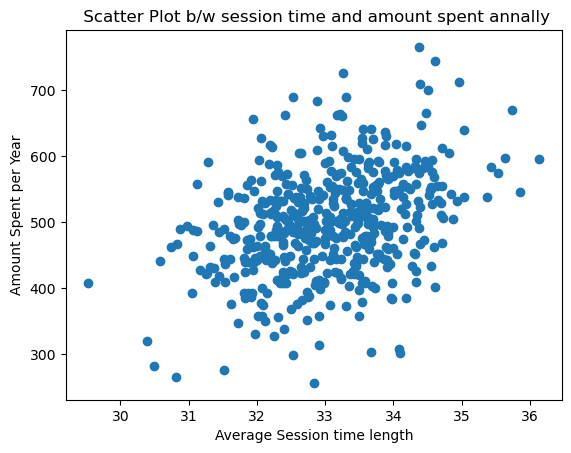

In [9]:
plt.scatter(y = data['Yearly Amount Spent'] ,x= data['Avg. Session Length'])
plt.xlabel("Average Session time length")
plt.ylabel("Amount Spent per Year")
plt.title(" Scatter Plot b/w session time and amount spent annally")
plt.show()

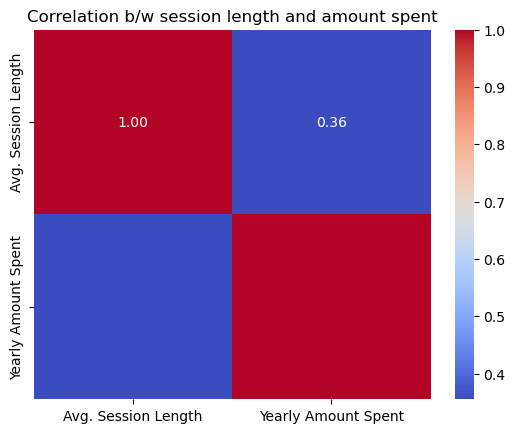

In [10]:
corr_matrix = data[['Avg. Session Length', 'Yearly Amount Spent']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation b/w session length and amount spent')
plt.show()

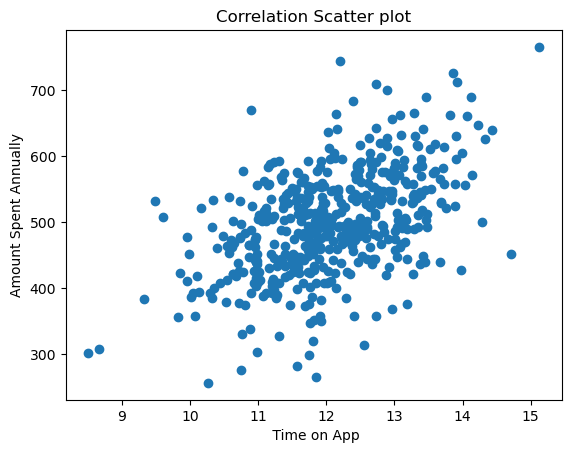

In [11]:
plt.scatter(x = data['Time on App'] ,y = data['Yearly Amount Spent'])
plt.xlabel(" Time on App")
plt.ylabel("Amount Spent Annually")
plt.title("Correlation Scatter plot")
plt.show()

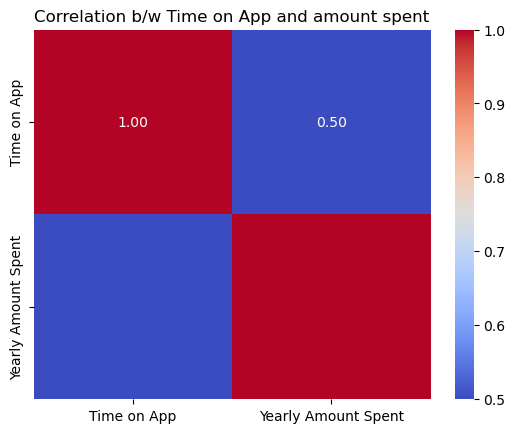

In [12]:
corr_matrix = data[['Time on App', 'Yearly Amount Spent']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation b/w Time on App and amount spent')
plt.show()

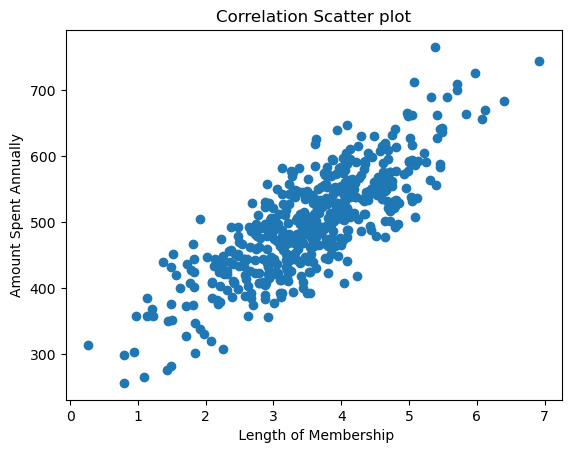

In [13]:
plt.scatter(x = data['Length of Membership'] ,y = data['Yearly Amount Spent'])
plt.xlabel(" Length of Membership")
plt.ylabel("Amount Spent Annually")
plt.title("Correlation Scatter plot")
plt.show()

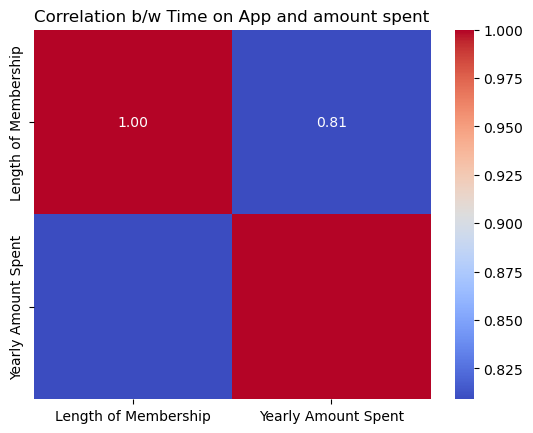

In [14]:
corr_matrix = data[['Length of Membership', 'Yearly Amount Spent']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation b/w Time on App and amount spent')
plt.show()

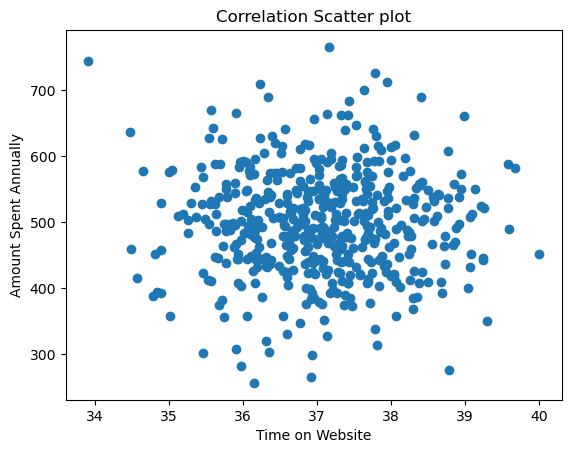

In [15]:
plt.scatter(x = data['Time on Website'] ,y = data['Yearly Amount Spent'])
plt.xlabel("Time on Website")
plt.ylabel("Amount Spent Annually")
plt.title("Correlation Scatter plot")
plt.show()

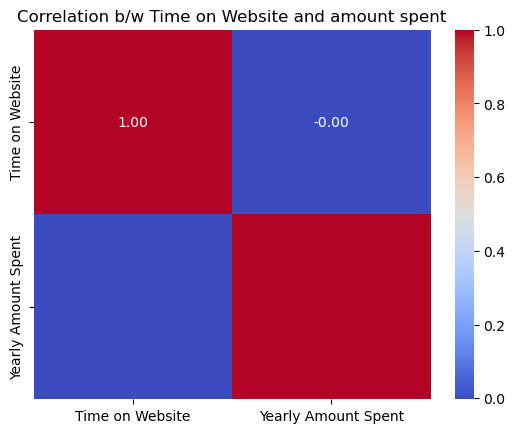

In [16]:
corr_matrix = data[['Time on Website', 'Yearly Amount Spent']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation b/w Time on Website and amount spent')
plt.show()

In [19]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Building model and checking the R2 score and mse score

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = data[["Avg. Session Length", "Time on App", "Length of Membership"]]
Y = data["Yearly Amount Spent"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [21]:
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)
r2_score = reg.score(x_test, y_test)
print("R-squared score:", r2_score)


Mean Squared Error: 99.54784735194538
R-squared score: 0.988119013738028


In [77]:
test_data = pd.DataFrame({
    "AvgSessionLength":[30.497268,30.926272	,33.000915,32.455433],
    "TimeonApp":[12.6,11.0,11.130278,12.44556],
    "LengthofMembership":[4.182621,2.264034	,4.55,4.22455]
})
future_x = test_data[['AvgSessionLength',"TimeonApp","LengthofMembership"]]
test_data['YearlyAmountSpent'] = reg.predict(future_x)
print(test_data['YearlyAmountSpent'] )


0    494.312326
1    325.445352
2    525.312959
3    541.646275
Name: YearlyAmountSpent, dtype: float64


D:\Python\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [78]:
test_data

,AvgSessionLength,TimeonApp,LengthofMembership,YearlyAmountSpent
0,30.497268,12.600000,4.182621,494.312326
1,30.926272,11.000000,2.264034,325.445352
2,33.000915,11.130278,4.550000,525.312959
3,32.455433,12.445560,4.224550,541.646275


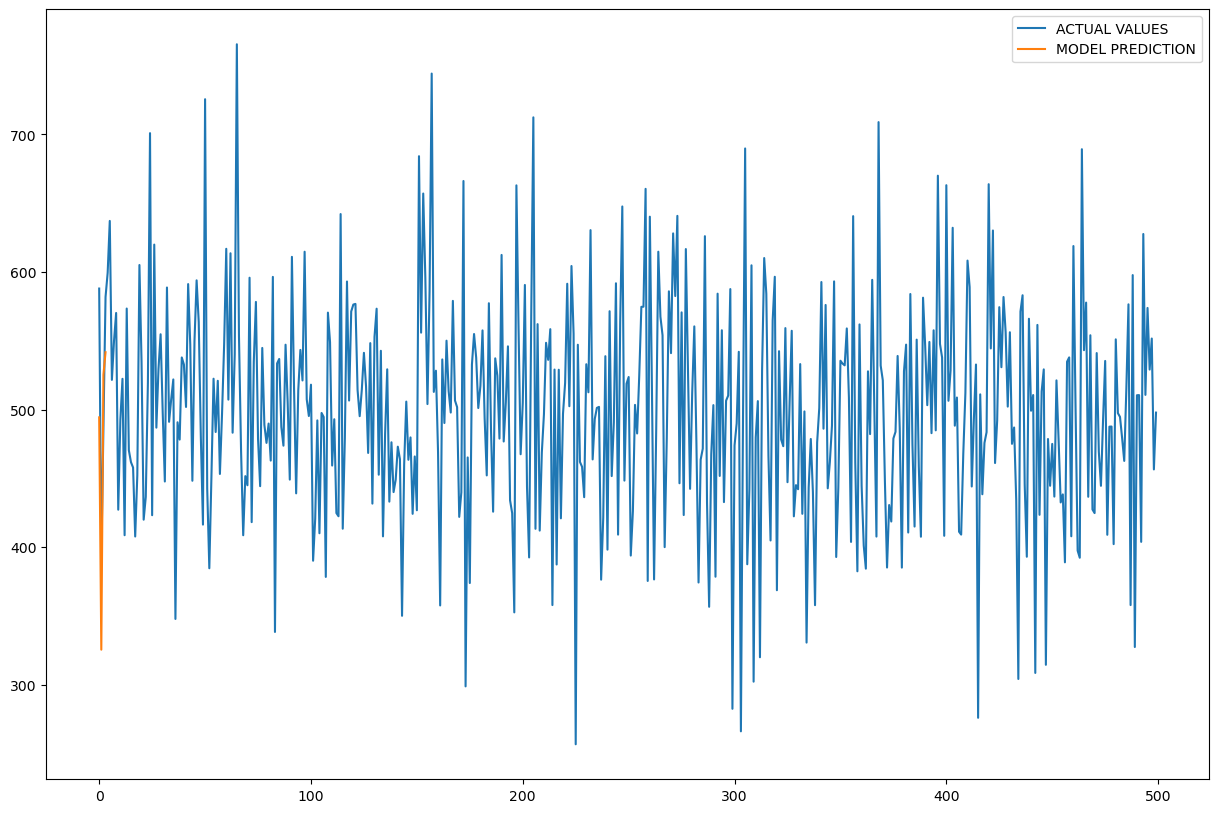

In [79]:
df_ = pd.concat([data["Yearly Amount Spent"],test_data["YearlyAmountSpent"]], axis=1)
df_.columns = ["y_test","y_pred"]
plt.figure(figsize=(15,10))
plt.plot(df_)
plt.legend(["ACTUAL VALUES" , "MODEL PREDICTION"])